In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from skimage.io import imread
import cv2

In [2]:
IMAGE_WIDTH=48
IMAGE_HEIGHT=48
IMAGE_CHANNELS=3
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
BATCH_SIZE = 32
EPOCHS = 10

In [3]:
ROOT_PATH = os.getcwd()

In [4]:
TRAIN_PATH_angry = ROOT_PATH + "\\..\\data\\images\\train\\angry\\"
TRAIN_PATH_disgust = ROOT_PATH + "\\..\\data\\images\\train\\disgust\\"
TRAIN_PATH_fear = ROOT_PATH + "\\..\\data\\images\\train\\fear\\"
TRAIN_PATH_happy = ROOT_PATH + "\\..\\data\\images\\train\\happy\\"
TRAIN_PATH_neutral = ROOT_PATH + "\\..\\data\\images\\train\\neutral\\"
TRAIN_PATH_sad = ROOT_PATH + "\\..\\data\\images\\train\\sad\\"
TRAIN_PATH_surprise = ROOT_PATH + "\\..\\data\\images\\train\\surprise\\"

In [5]:

filenames_angry = os.listdir(TRAIN_PATH_angry)

    
df_1 = pd.DataFrame({
    'filename': filenames_angry,
    'category': 'angry'
})

filenames_disgust = os.listdir(TRAIN_PATH_disgust)

    
df_2 = pd.DataFrame({
    'filename': filenames_disgust,
    'category': 'disgust'
})

filenames_fear = os.listdir(TRAIN_PATH_fear)

    
df_3 = pd.DataFrame({
    'filename': filenames_fear,
    'category': 'fear'
})

filenames_happy = os.listdir(TRAIN_PATH_happy)

    
df_4 = pd.DataFrame({
    'filename': filenames_happy,
    'category': 'happy'
})

filenames_neutral = os.listdir(TRAIN_PATH_neutral)

    
df_5 = pd.DataFrame({
    'filename': filenames_neutral,
    'category': 'neutral'
})

filenames_sad = os.listdir(TRAIN_PATH_sad)

    
df_6 = pd.DataFrame({
    'filename': filenames_sad,
    'category': 'sad'
})

filenames_surprise = os.listdir(TRAIN_PATH_surprise)

    
df_7 = pd.DataFrame({
    'filename': filenames_surprise,
    'category': 'surprise'
})



In [6]:
df_train = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7])

In [7]:
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad','surprise']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
class_names_label

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [8]:
def read_data(path, im_size):
    X = []
    Y = []

    
    # Iterar sobre todo lo que haya en path
    for file in os.listdir(path):
        
        # Leer la imagen a color y aplicarle el resize
        image = imread(path + file,cv2.COLOR_GRAY2BGR)
        smallimage = cv2.resize(image, (im_size, im_size))
        
        # Guardo en X
        X.append(smallimage)
     

    return np.array(X)
    

X_train1 = read_data(TRAIN_PATH_angry, IMAGE_WIDTH)

X_train2 = read_data(TRAIN_PATH_disgust, IMAGE_WIDTH)

X_train3= read_data(TRAIN_PATH_fear, IMAGE_WIDTH)

X_train4 = read_data(TRAIN_PATH_happy, IMAGE_WIDTH)

X_train5 = read_data(TRAIN_PATH_neutral, IMAGE_WIDTH)

X_train6 = read_data(TRAIN_PATH_sad, IMAGE_WIDTH)

X_train7 = read_data(TRAIN_PATH_surprise, IMAGE_WIDTH)


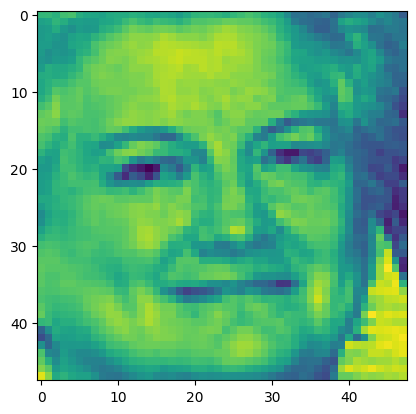

In [9]:
plt.imshow(X_train4[0])

In [10]:
X = np.vstack((X_train1, X_train2, X_train3, X_train4, X_train5, X_train6,X_train7))

In [11]:
df_train['numero_categoria'] = df_train['category'].map(class_names_label)

In [12]:
df_train.reset_index(inplace=True)

In [13]:
y = np.array(df_train['numero_categoria'])

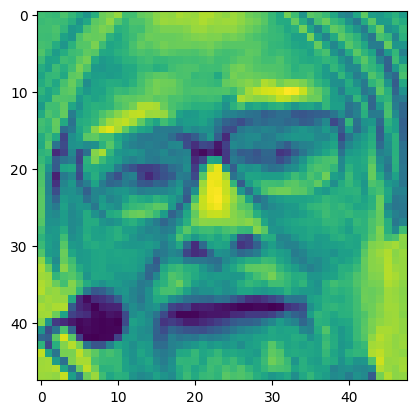

In [14]:
plt.imshow(X[1]);

In [15]:
print("Min:", np.min(X))
print("Max:", np.max(X))

Min: 0
Max: 255


In [16]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=10)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.15,
                                                   random_state=0)

In [18]:
y_train[0:200]

array([3, 3, 2, 6, 0, 2, 6, 5, 0, 0, 3, 3, 6, 0, 4, 3, 2, 0, 4, 6, 3, 4,
       4, 0, 6, 6, 3, 6, 0, 3, 6, 4, 4, 5, 2, 3, 3, 4, 0, 4, 4, 3, 2, 2,
       5, 4, 0, 3, 6, 0, 2, 4, 5, 2, 0, 5, 4, 4, 4, 6, 3, 4, 3, 3, 4, 6,
       0, 2, 3, 5, 0, 6, 3, 2, 0, 0, 3, 0, 3, 6, 4, 2, 0, 5, 2, 2, 0, 3,
       0, 3, 3, 5, 2, 3, 4, 3, 2, 6, 5, 4, 5, 5, 3, 4, 2, 3, 0, 0, 3, 1,
       6, 6, 3, 0, 5, 5, 2, 2, 4, 2, 0, 3, 5, 4, 3, 2, 6, 3, 2, 3, 5, 5,
       4, 6, 6, 0, 4, 4, 0, 2, 3, 3, 4, 5, 3, 4, 0, 6, 4, 3, 0, 6, 3, 3,
       2, 3, 4, 5, 3, 0, 0, 6, 6, 0, 2, 4, 6, 2, 3, 3, 0, 0, 4, 3, 4, 2,
       0, 0, 6, 0, 3, 3, 3, 4, 2, 4, 0, 2, 5, 0, 4, 4, 2, 2, 3, 4, 6, 3,
       3, 5], dtype=int64)

In [19]:
X_train = X_train/255
X_test = X_test/255

In [20]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

In [21]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience=5)

In [22]:
from keras.callbacks import ModelCheckpoint
mcheckpoint = ModelCheckpoint("callback_model.h5")

In [23]:
from keras.utils import to_categorical
y_one_hot = to_categorical(y, num_classes=7)

In [25]:
import tensorflow as tf
tf.keras.backend.clear_session()


In [26]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", padding='same', input_shape=(48, 48, 1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation="relu", padding='same'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation="relu", padding='same'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(7, activation="softmax")
])


In [27]:
model.compile(optimizer='rmsprop', loss="categorical_crossentropy", metrics=['accuracy'])

In [28]:
history = model.fit(X, y_one_hot, batch_size=128, epochs=20, callbacks = [earlystop, mcheckpoint], validation_split=0.2)

Epoch 1/20


181/181 [==============================] - 15s 76ms/step - loss: 2.6196 - accuracy: 0.2315 - val_loss: 1.8560 - val_accuracy: 0.2010
Epoch 2/20
  2/181 [..............................] - ETA: 11s - loss: 1.8286 - accuracy: 0.1680

c:\Users\Manolo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


181/181 [==============================] - 14s 78ms/step - loss: 1.7204 - accuracy: 0.3025 - val_loss: 1.7972 - val_accuracy: 0.2312
Epoch 3/20
181/181 [==============================] - 16s 88ms/step - loss: 1.5566 - accuracy: 0.3913 - val_loss: 1.8159 - val_accuracy: 0.3559
Epoch 4/20
181/181 [==============================] - 16s 86ms/step - loss: 1.4089 - accuracy: 0.4578 - val_loss: 1.5951 - val_accuracy: 0.4175
Epoch 5/20
181/181 [==============================] - 15s 85ms/step - loss: 1.2978 - accuracy: 0.5034 - val_loss: 1.4825 - val_accuracy: 0.4543
Epoch 6/20
181/181 [==============================] - 14s 76ms/step - loss: 1.2074 - accuracy: 0.5403 - val_loss: 1.3721 - val_accuracy: 0.4918
Epoch 7/20
181/181 [==============================] - 15s 84ms/step - loss: 1.1168 - accuracy: 0.5779 - val_loss: 1.5820 - val_accuracy: 0.4033
Epoch 8/20
181/181 [==============================] - 14s 80ms/step - loss: 1.0334 - accuracy: 0.6103 - val_loss: 1.9471 - val_accuracy: 0.3759
Epo

In [23]:
'''model = keras.Sequential([
    keras.layers.Conv2D(128, (3,3), activation="relu", input_shape=(64, 64, 1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(7, activation="softmax")
])'''

In [24]:
#model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [25]:
#history = model.fit(X, y, batch_size=128, epochs=20, callbacks = [earlystop, mcheckpoint], validation_split=0.2)

Epoch 1/20


181/181 [==============================] - 71s 387ms/step - loss: 1.9236 - accuracy: 0.2358 - val_loss: 1.8042 - val_accuracy: 0.2590
Epoch 2/20


c:\Users\Manolo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


181/181 [==============================] - 90s 497ms/step - loss: 1.7754 - accuracy: 0.2758 - val_loss: 1.7340 - val_accuracy: 0.3032
Epoch 3/20
181/181 [==============================] - 92s 509ms/step - loss: 1.7010 - accuracy: 0.3232 - val_loss: 1.6836 - val_accuracy: 0.3606
Epoch 4/20
181/181 [==============================] - 92s 507ms/step - loss: 1.6090 - accuracy: 0.3696 - val_loss: 1.5870 - val_accuracy: 0.3785
Epoch 5/20
181/181 [==============================] - 69s 383ms/step - loss: 1.5439 - accuracy: 0.3964 - val_loss: 1.5404 - val_accuracy: 0.4062
Epoch 6/20
181/181 [==============================] - 53s 290ms/step - loss: 1.4825 - accuracy: 0.4242 - val_loss: 1.6276 - val_accuracy: 0.3657
Epoch 7/20
181/181 [==============================] - 53s 296ms/step - loss: 1.4295 - accuracy: 0.4465 - val_loss: 1.5034 - val_accuracy: 0.4262
Epoch 8/20
181/181 [==============================] - 53s 292ms/step - loss: 1.3773 - accuracy: 0.4738 - val_loss: 1.4875 - val_accuracy: 0.4

In [131]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 128)        

In [132]:
results = model.evaluate(X_test, y_test)
results

ValueError: in user code:

    File "c:\Users\Manolo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\Manolo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Manolo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "c:\Users\Manolo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1919, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\Manolo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "c:\Users\Manolo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\Manolo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\Manolo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\Manolo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\Manolo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 7) are incompatible


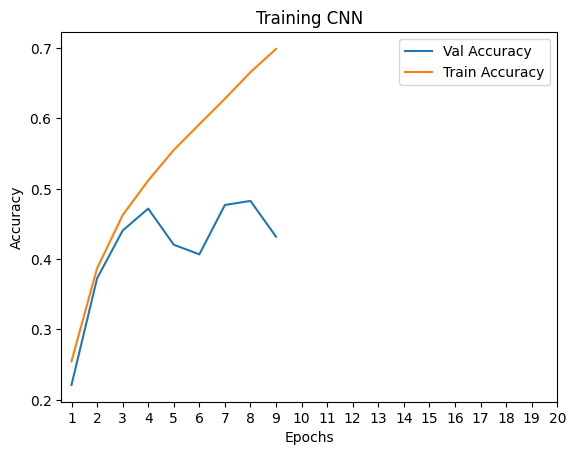

In [134]:
df_hist = pd.DataFrame(history.history, index=np.arange(1,10))

plt.plot(df_hist['val_accuracy'], label="Val Accuracy")
plt.plot(df_hist['accuracy'], label="Train Accuracy")
plt.title("Training CNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(range(1,21))
plt.legend()

In [33]:
TEST_PATH = ROOT_PATH + "\\..\\data\\images\\test\\"

In [34]:
def read_data(path, im_size):
    X = {'nombre':[],'imagen':[]}


    ##### CODE #####
    # Iterar sobre todo lo que haya en path

    for file in os.listdir(path):
        print(file)
 
        # Leer la imagen a color y aplicarle el resize
        image = imread(path + file,cv2.COLOR_GRAY2BGR)
        smallimage = cv2.resize(image, (im_size, im_size))
        
        # Guardo en X
        
        X['imagen'].append(smallimage)
        X['nombre'].append(file)


    return pd.DataFrame(X)
    

test = read_data(TEST_PATH, IMAGE_WIDTH)

10004.jpg
10019.jpg
10023.jpg
10029.jpg
1003.jpg
10031.jpg
10033.jpg
10043.jpg
10044.jpg
10048.jpg
10052.jpg
10053.jpg
10056.jpg
10065.jpg
10068.jpg
10073.jpg
10074.jpg
10079.jpg
1008.jpg
10095.jpg
10096.jpg
10097.jpg
10099.jpg
101.jpg
10106.jpg
10114.jpg
10116.jpg
10117.jpg
10118.jpg
10121.jpg
10126.jpg
10134.jpg
10138.jpg
10141.jpg
10148.jpg
10150.jpg
10162.jpg
10163.jpg
10171.jpg
10172.jpg
10176.jpg
10185.jpg
10189.jpg
1020.jpg
10215.jpg
10218.jpg
1022.jpg
10237.jpg
1024.jpg
10246.jpg
10247.jpg
10248.jpg
10252.jpg
10257.jpg
10259.jpg
1026.jpg
10263.jpg
10266.jpg
10267.jpg
10268.jpg
1027.jpg
10273.jpg
10276.jpg
10278.jpg
10286.jpg
10292.jpg
10306.jpg
10312.jpg
10315.jpg
10317.jpg
1033.jpg
10336.jpg
10338.jpg
10339.jpg
10344.jpg
10346.jpg
10352.jpg
10355.jpg
10362.jpg
10365.jpg
10367.jpg
10370.jpg
10371.jpg
10372.jpg
10375.jpg
10382.jpg
10383.jpg
10386.jpg
10399.jpg
10406.jpg
10409.jpg
10415.jpg
10423.jpg
10425.jpg
10426.jpg
10432.jpg
10435.jpg
10437.jpg
10443.jpg
10444.jpg
10445.jpg


In [35]:
test['id_img'] = test['nombre'].apply(lambda x: os.path.splitext(x)[0])

In [36]:
sample = pd.read_csv('sample_submision.csv')


In [37]:
test['id_img'] = test['id_img'].astype('int64')

In [38]:
df_test = pd.merge(sample, test, how='left', left_on='id_img', right_on='id_img')


In [39]:
test_final = df_test['imagen'].values.tolist()

In [40]:
lista_imagenes = []
for imagen in df_test['imagen']:
    lista_imagenes.append(list(imagen))




In [41]:
test_final = np.array(lista_imagenes)

In [42]:
print("Min:", np.min(test_final))
print("Max:", np.max(test_final))

Min: 0
Max: 255


In [43]:
test_final = test_final / 255

In [44]:
print("Min:", np.min(test_final))
print("Max:", np.max(test_final))

Min: 0.0
Max: 1.0


In [45]:
test_final[0].shape

(64, 64)

In [46]:
predictions = model.predict(test_final)
predictions

221/221 [==============================] - 6s 25ms/step


array([[0.24567895, 0.03570193, 0.13600136, ..., 0.27296603, 0.15813498,
        0.08800678],
       [0.18357408, 0.04426246, 0.12402426, ..., 0.31242126, 0.15195696,
        0.08274505],
       [0.13148324, 0.07291482, 0.13129205, ..., 0.23225877, 0.2597463 ,
        0.0479666 ],
       ...,
       [0.22661787, 0.05933157, 0.11854849, ..., 0.26250136, 0.09727286,
        0.1111532 ],
       [0.1681003 , 0.04883404, 0.11599683, ..., 0.29587597, 0.22205617,
        0.04739421],
       [0.16521929, 0.05257278, 0.12172274, ..., 0.2727752 , 0.25454462,
        0.04383341]], dtype=float32)

In [47]:
etiquetas_prediccion = np.argmax(predictions, axis=1)
etiquetas_prediccion

array([4, 4, 5, ..., 4, 4, 4], dtype=int64)

In [48]:
submision_2 = pd.DataFrame(etiquetas_prediccion)


In [49]:
submision_2.columns = ['categoria']

In [50]:
submision_2

,categoria
0,4
1,4
2,5
3,4
4,4
...,...
7061,5
7062,0
7063,4
7064,4


In [51]:
etiquetas = {0 : 'angry', 1 : 'disgust', 2 :'fear',3 : 'happy', 4 : 'neutral',5 : 'sad',6 : 'surprise' }

In [52]:
submision_2['label'] = submision_2['categoria'].map(etiquetas)

In [53]:
submision = pd.read_csv('test_set.csv')

In [54]:
submision_2.drop(['categoria'],axis=1, inplace=True)

In [55]:
submision['label'] = submision_2['label']

In [57]:
submision.head(20)

,id_img,label
0,10052,neutral
1,10065,neutral
2,10079,sad
3,10095,neutral
4,10121,neutral
5,10148,neutral
6,10163,neutral
7,10215,neutral
8,1024,neutral
9,10286,neutral


In [77]:
submision.to_csv('submision.csv',index=False)

In [58]:
test_final.shape

(7066, 64, 64)

In [59]:
submision

,id_img,label
0,10052,neutral
1,10065,neutral
2,10079,sad
3,10095,neutral
4,10121,neutral
...,...,...
7061,9806,sad
7062,9830,angry
7063,9853,neutral
7064,9878,neutral


In [60]:
test

,nombre,imagen,id_img
0,10004.jpg,"[[1, 1, 1, 1, 2, 5, 10, 15, 16, 11, 10, 11, 13...",10004
1,10019.jpg,"[[159, 158, 157, 159, 165, 168, 170, 170, 172,...",10019
2,10023.jpg,"[[195, 197, 196, 193, 190, 159, 114, 68, 56, 7...",10023
3,10029.jpg,"[[41, 45, 51, 58, 65, 67, 67, 68, 74, 81, 88, ...",10029
4,1003.jpg,"[[44, 37, 28, 21, 23, 27, 29, 29, 33, 36, 38, ...",1003
...,...,...,...
7061,9977.jpg,"[[178, 153, 135, 130, 131, 148, 170, 187, 183,...",9977
7062,9979.jpg,"[[243, 243, 241, 233, 201, 189, 181, 175, 169,...",9979
7063,9982.jpg,"[[203, 219, 231, 234, 237, 235, 233, 233, 237,...",9982
7064,9984.jpg,"[[57, 56, 56, 58, 62, 62, 59, 56, 58, 58, 59, ...",9984


In [61]:
submision

,id_img,label
0,10052,neutral
1,10065,neutral
2,10079,sad
3,10095,neutral
4,10121,neutral
...,...,...
7061,9806,sad
7062,9830,angry
7063,9853,neutral
7064,9878,neutral


In [62]:
sample = pd.read_csv('sample_submision.csv')
sample

,id_img,label
0,10052,surprise
1,10065,surprise
2,10079,surprise
3,10095,surprise
4,10121,surprise
...,...,...
7061,9806,surprise
7062,9830,surprise
7063,9853,surprise
7064,9878,surprise
